In [4]:
%load_ext autoreload
%autoreload complete

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from matplotlib_inline.backend_inline import set_matplotlib_formats
from tqdm.notebook import tqdm

from src.cache import cache

set_matplotlib_formats("svg")

In [9]:
from src.features.aggregation import all_regions

# get a random date where occ_protest is 1 in a random region
dfs = all_regions(ignore_group=True, protest_source="acled")
region = np.random.randint(0, len(dfs))
region_name, df_w = dfs[region]
date_ = df_w[df_w.occ_protest == 1].sample(1).index[0]

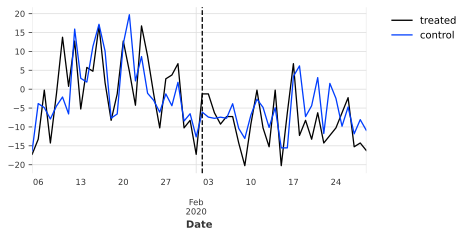

In [10]:
from src.models.synthetic_control import synthetic_control

y, y_c = synthetic_control(region_name, date_)
fig, ax = plt.subplots(figsize=(6, 3))

y["media_online_protest"].plot(ax=ax, label="treated")
y_c["media_online_protest"].plot(ax=ax, label="control")
ax.set_xlabel("Date")
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
ax.axvline(date_, color="black", linestyle="--")
plt.show()

In [16]:
from src.models.synthetic_control import compute_synthetic_controls

y, y_c = compute_synthetic_controls(rolling=1, scale=None, n_jobs=4)

  0%|          | 0/894 [00:00<?, ?it/s]

1217.96s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1217.98s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1217.99s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
1218.00s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


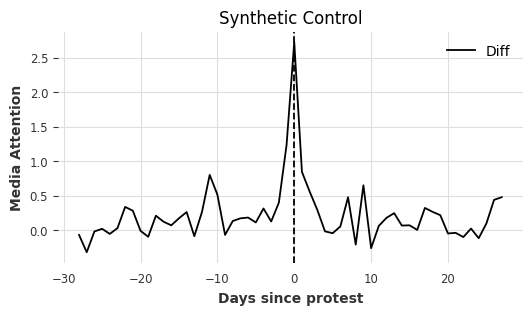

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 3))
dimension = "media_online_protest"
# ax.plot(ys.index, ys.mean(axis=1), label="Actual")
# ax.plot(y_cs.index, y_cs.mean(axis=1), label="Synthetic")
ax.plot(y.index, (y[dimension] - y_c[dimension]), label="Diff")
ax.legend()
ax.set_title("Synthetic Control")
ax.set_ylabel("Media Attention")
ax.set_xlabel("Days since protest")
ax.axvline(0, color="black", linestyle="--")
plt.show()